<a href="https://colab.research.google.com/github/annaclrl/cp5-ia/blob/main/cp5_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importando bibliotecas***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Configurações de visualização
plt.style.use('seaborn-v0_8') # aqui escolhemos um "tema" moderno para os gráficos
sns.set_palette("husl")  # e aqui as cores harmoniosas e distintas

##Definição do problema


*  **Objetivo de Classificação:** Classificação binária para diagnóstico de câncer
de mama

    Classe 0: Benigno (B)

    Classe 1: Maligno (M)


*   **Justificativa da Escolha:** O diagnóstico precoce do câncer de mama é crucial para o tratamento eficaz. Um modelo de IA pode auxiliar profissionais de saúde na identificação de padrões complexos nos dados, potencialmente melhorando a precisão diagnóstica



##Descrição do Dataset


*   Origem: Kaggle – Breast Cancer Wisconsin (Diagnostic) Dataset
*   Quantidade: 569 registros × 32 colunas
*   Variáveis: 32 variáveis (incluindo ID e diagnóstico). Características incluem raio, textura, perímetro, área, suavidade, compactação, concavidade, etc.






In [ ]:
# Carregamento e exploração inicial do dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Forma do dataset: {df.shape}")
print(f"\nQuantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")
print(f"\nPrimeiras 5 linhas:")
print(df.head())

=== INFORMAÇÕES GERAIS DO DATASET ===
Forma do dataset: (569, 33)

Quantidade de linhas: 569
Quantidade de colunas: 33

Primeiras 5 linhas:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   


In [ ]:
print(f"\nInformações sobre tipos de dados:")
print(df.info())


Informações sobre tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    floa

In [ ]:
print(f"\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01

In [ ]:
print(f"\nDistribuição da variável alvo 'diagnosis':")
print(df['diagnosis'].value_counts())
print(f"Proporção: {df['diagnosis'].value_counts(normalize=True)}")


Distribuição da variável alvo 'diagnosis':
diagnosis
B    357
M    212
Name: count, dtype: int64
Proporção: diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [ ]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

###Resumo do que foi feito na parte de descrição do dataset

- pd.read_csv(): lê o arquivo de dados como uma tabela

- df.shape: mostra quantas linhas (pacientes) e colunas (informações)

- df.head(): mostra as primeiras linhas para vermos como são os dados

- df['diagnosis']: é nossa "resposta" - o que queremos prever



##Pré-processamento

In [ ]:
# Verificação e tratamento de valores ausentes
print("=== VERIFICAÇÃO DE VALORES AUSENTES ===")
print(df.isnull().sum())

=== VERIFICAÇÃO DE VALORES AUSENTES ===
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0

In [ ]:
# Remover coluna 'Unnamed: 32' se existir (geralmente vazia)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("Removida coluna vazia 'Unnamed: 32'")

Removida coluna vazia 'Unnamed: 32'


In [ ]:
# Removendo 'id' - número do paciente não ajuda no diagnóstico
df = df.drop('id', axis=1)

In [ ]:
# Os diagnósticos estão como 'B' e 'M', mas computadores entendem números melhor
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
# Agora: 0 = Benigno (B), 1 = Maligno (M)

print(f"Diagnósticos após transformação: {df['diagnosis'].value_counts()}")

Diagnósticos após transformação: diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
#Separando que queremos prever
X = df.drop('diagnosis', axis=1)  # todas as características dos tumores
y = df['diagnosis']              # 0 diagnóstico (o que queremos prever)

print(f"Características: {X.shape[1]} tipos de medidas")
print(f"Diagnósticos para prever: {len(y)}")

Características: 30 tipos de medidas
Diagnósticos para prever: 569


In [ ]:
#Identificação de outilers usando o IQR
print("\nANÁLISE DE OUTLIERS:")

# definimos uma função para encontrar outliers usando o método IQR
def encontrar_valores_extremos(dados):
    extremos = {}  # dicionário para guardar o número de outliers por coluna
    for coluna in dados.columns:  # para cada coluna nos nossos dados
        # calcula o primeiro quartil (25%)
        Q1 = dados[coluna].quantile(0.25)
        # calcula o terceiro quartil (75%)
        Q3 = dados[coluna].quantile(0.75)
        # calcula o IQR (Intervalo Interquartil)
        IQR = Q3 - Q1
        # define os limites: valores abaixo do limite inferior ou acima do superior são outliers
        limite_baixo = Q1 - 1.5 * IQR
        limite_alto = Q3 + 1.5 * IQR
        # conta quantos valores estão fora desses limites
        extremos[coluna] = len(dados[(dados[coluna] < limite_baixo) | (dados[coluna] > limite_alto)])
    return extremos

# aplica a função aos nossos dados
valores_extremos = encontrar_valores_extremos(X)

# mostra os resultados para as primeiras 5 colunas
print("Alguns valores extremos encontrados:")
for caracteristica, quantidade in list(valores_extremos.items())[:5]:
    print(f"  {caracteristica}: {quantidade} valores extremos")


ANÁLISE DE OUTLIERS:
Alguns valores extremos encontrados:
  radius_mean: 14 valores extremos
  texture_mean: 7 valores extremos
  perimeter_mean: 13 valores extremos
  area_mean: 25 valores extremos
  smoothness_mean: 6 valores extremos


In [ ]:
#Padronizando as medidas
print("\nPADRONIZANDO AS MEDIDAS")
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)
X_padronizado = pd.DataFrame(X_padronizado, columns=X.columns)

print("Todas as medidas agora estão na mesma escala!")
print(f"   Médias próximas de 0: {np.mean(X_padronizado, axis=0)[:3]}")
print(f"   Desvios padrão próximos de 1: {np.std(X_padronizado, axis=0)[:3]}")


PADRONIZANDO AS MEDIDAS
Todas as medidas agora estão na mesma escala!
   Médias próximas de 0: radius_mean      -1.373633e-16
texture_mean      6.868164e-17
perimeter_mean   -1.248757e-16
dtype: float64
   Desvios padrão próximos de 1: radius_mean       1.0
texture_mean      1.0
perimeter_mean    1.0
dtype: float64


##Modelagem

In [ ]:
#Dividindo nosso testes
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_padronizado, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dados para TREINAR os modelos: {X_treino.shape[0]} pacientes")
print(f"Dados para TESTAR os modelos: {X_teste.shape[0]} pacientes")
print(f"Proporção mantida: {y_treino.value_counts(normalize=True)}")


Dados para TREINAR os modelos: 398 pacientes
Dados para TESTAR os modelos: 171 pacientes
Proporção mantida: diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64


In [ ]:
# Lista de modelos a serem testados
models = {
    'Regressão Logística': LogisticRegression(random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [ ]:
#Para guardar os resultados
resultados = {}

In [ ]:
print("TREINANDO NOSSOS MODELOS")
for nome, modelo in models.items():
    print(f"Treinando {nome}")

    # ENSINANDO o modelo com dados de treino
    modelo.fit(X_treino, y_treino)

    # TESTANDO o modelo com dados novos
    previsoes = modelo.predict(X_teste)

    # Calculando quâ bom ele foi
    acuracia = accuracy_score(y_teste, previsoes)  # % de acertos totais
    precisao = precision_score(y_teste, previsoes)  # Dos que disse ser câncer, quantos realmente eram?
    recall = recall_score(y_teste, previsoes)       # Dos que tinham câncer, quantos identificou?
    f1 = f1_score(y_teste, previsoes)              # Média balanceada entre precisão e recall

    # Guardando os resultados
    resultados[nome] = {
        'modelo': modelo,
        'acuracia': acuracia,
        'precisao': precisao,
        'recall': recall,
        'f1': f1,
        'previsoes': previsoes
    }

    print(f"{nome}: {acuracia:.1%} de acerto")

TREINANDO NOSSOS MODELOS
Treinando Regressão Logística
Regressão Logística: 97.1% de acerto
Treinando LDA
LDA: 97.7% de acerto
Treinando Naive Bayes
Naive Bayes: 93.6% de acerto
Treinando KNN
KNN: 96.5% de acerto
Treinando SVM
SVM: 96.5% de acerto
Treinando Árvore de Decisão
Árvore de Decisão: 90.1% de acerto
Treinando Random Forest
Random Forest: 96.5% de acerto


In [ ]:
# TESTE MAIS ROBUSTO: Validação Cruzada
print("\nFAZENDO UM TESTE MAIS CONFIÁVEL")
from sklearn.model_selection import cross_val_score

melhores_modelos = ['Random Forest', 'SVM', 'Regressão Logística']
for nome_modelo in melhores_modelos:
    modelo = models[nome_modelo]
    # divide os dados em 5 partes, treina em 4 e testa em 1, repetindo 5 vezes
    scores_cv = cross_val_score(modelo, X_padronizado, y, cv=5, scoring='accuracy')
    print(f"{nome_modelo}: {scores_cv.mean():.1%} (±{scores_cv.std() * 2:.1%})")


FAZENDO UM TESTE MAIS CONFIÁVEL
Random Forest: 95.4% (±4.3%)
SVM: 97.4% (±2.9%)
Regressão Logística: 98.1% (±1.3%)


##Avaliação do modelo

In [ ]:
#FUNÇÃO PARA MOSTRAR A "TABELA DE ACERTOS E ERROS"
def mostrar_matriz_confusao(valor_real, valor_previsto, nome_modelo):
    """
    A Matriz de Confusão é como uma tabela que mostra:
    - Quantos acertamos
    - Quantos erramos
    - Que tipos de erros cometemos
    """
    cm = confusion_matrix(valor_real, valor_previsto)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Benigno', 'Maligno'],
               yticklabels=['Benigno', 'Maligno'])
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.ylabel('REAL: O que realmente era')
    plt.xlabel('PREVISTO: O que o modelo achou')
    plt.show()

    # Explicando o que cada número significa
    print(f"""
    {nome_modelo} - O QUE SIGNIFICAM ESSES NÚMEROS:

    ACERTOS:
    • {cm[0,0]} vezes disse BENIGNO e era BENIGNO mesmo
    • {cm[1,1]} vezes disse MALIGNO e era MALIGNO mesmo

    ERROS:
    • {cm[0,1]} vezes disse MALIGNO mas era BENIGNO (Falso Alarme)
    • {cm[1,0]} vezes disse BENIGNO mas era MALIGNO (ERRO GRAVE!)

    NO CONTEXTO MÉDICO:
    • Falsos Alarmes ({cm[0,1]}): Paciente se assusta sem necessidade
    • Erros Graves ({cm[1,0]}): Paciente com câncer pode não ser tratado a tempo
    """)



In [ ]:
# COMPARAÇÃO DETALHADA: NOSSA "TABELA DE CLASSIFICAÇÃO"
print("TABELA DE CLASSIFICAÇÃO DOS MODELOS:")
comparison_df = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Acurácia': [resultados[model]['acuracia'] for model in resultados],
    'Precisão': [resultados[model]['precisao'] for model in resultados],
    'Recall': [resultados[model]['recall'] for model in resultados],
    'F1-Score': [resultados[model]['f1'] for model in resultados]
}).sort_values('Acurácia', ascending=False)

print(comparison_df)

print("""
  ENTENDENDO AS COLUNAS DA TABELA:

• ACURÁCIA: "Quantos % de todos os pacientes foram diagnosticados corretamente?"
  Exemplo: 95% = Em 100 pacientes, acertou 95

• PRECISÃO: "Quando ele diz 'é câncer', qual a chance de estar certo?"
  Exemplo: 97% = Quando diz "é câncer", está certo 97 vezes em 100

• RECALL: "Dos que realmente tinham câncer, quantos % ele encontrou?"
  Exemplo: 93% = Encontrou 93 em cada 100 casos de câncer

• F1-SCORE: "Nota geral que balanceia Precisão e Recall"
  Quanto mais perto de 1, melhor o equilíbrio
""")


TABELA DE CLASSIFICAÇÃO DOS MODELOS:
                Modelo  Acurácia  Precisão   Recall  F1-Score
1                  LDA  0.976608  1.000000  0.93750  0.967742
0  Regressão Logística  0.970760  0.983607  0.93750  0.960000
3                  KNN  0.964912  1.000000  0.90625  0.950820
6        Random Forest  0.964912  1.000000  0.90625  0.950820
4                  SVM  0.964912  1.000000  0.90625  0.950820
2          Naive Bayes  0.935673  0.949153  0.87500  0.910569
5    Árvore de Decisão  0.900585  0.885246  0.84375  0.864000

  ENTENDENDO AS COLUNAS DA TABELA:

• ACURÁCIA: "Quantos % de todos os pacientes foram diagnosticados corretamente?"
  Exemplo: 95% = Em 100 pacientes, acertou 95

• PRECISÃO: "Quando ele diz 'é câncer', qual a chance de estar certo?"
  Exemplo: 97% = Quando diz "é câncer", está certo 97 vezes em 100

• RECALL: "Dos que realmente tinham câncer, quantos % ele encontrou?"
  Exemplo: 93% = Encontrou 93 em cada 100 casos de câncer

• F1-SCORE: "Nota geral que balanc


CRIANDO UM GRÁFICO PARA VER MELHOR


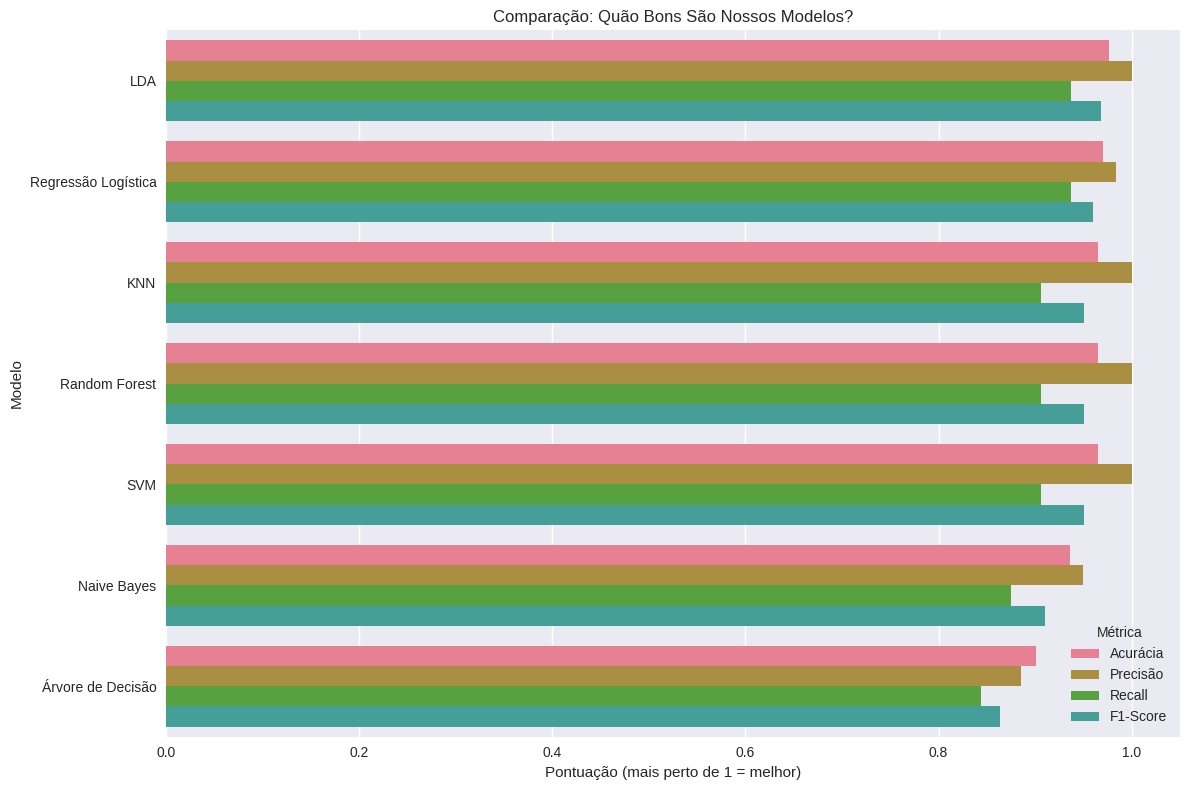

In [ ]:
# GRÁFICO COMPARATIVO - VISUALIZANDO OS RESULTADOS
print("\nCRIANDO UM GRÁFICO PARA VER MELHOR")
plt.figure(figsize=(12, 8))
metrics_df = comparison_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')
sns.barplot(data=metrics_df, x='Valor', y='Modelo', hue='Métrica')
plt.title('Comparação: Quão Bons São Nossos Modelos?')
plt.xlabel('Pontuação (mais perto de 1 = melhor)')
plt.tight_layout()
plt.show()



ANALISANDO O LDA:

RELATÓRIO DETALHADO:
              precision    recall  f1-score   support

     Benigno       0.96      1.00      0.98       107
     Maligno       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



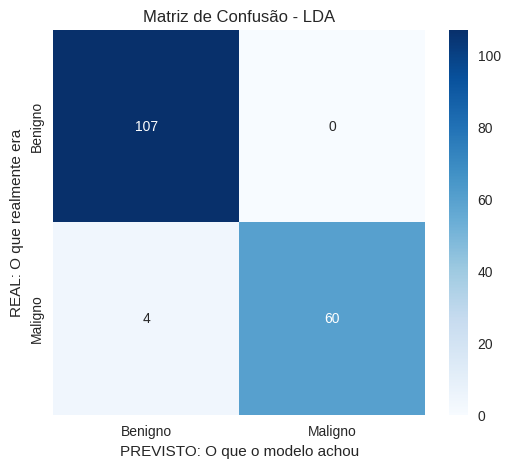


    LDA - O QUE SIGNIFICAM ESSES NÚMEROS:
    
    ACERTOS:
    • 107 vezes disse BENIGNO e era BENIGNO mesmo
    • 60 vezes disse MALIGNO e era MALIGNO mesmo
    
    ERROS:
    • 0 vezes disse MALIGNO mas era BENIGNO (Falso Alarme)
    • 4 vezes disse BENIGNO mas era MALIGNO (ERRO GRAVE!)
    
    NO CONTEXTO MÉDICO:
    • Falsos Alarmes (0): Paciente se assusta sem necessidade
    • Erros Graves (4): Paciente com câncer pode não ser tratado a tempo
    

ANALISANDO O Regressão Logística:

RELATÓRIO DETALHADO:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.98       107
     Maligno       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



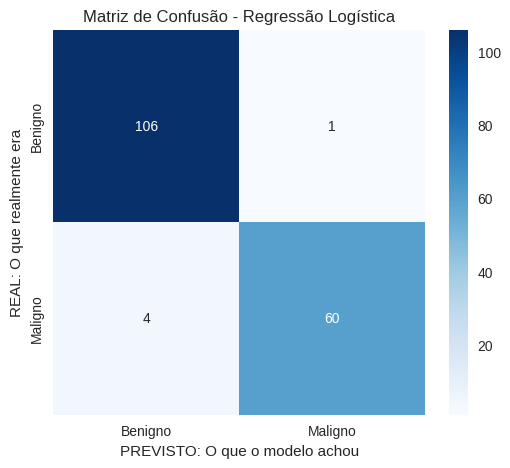


    Regressão Logística - O QUE SIGNIFICAM ESSES NÚMEROS:
    
    ACERTOS:
    • 106 vezes disse BENIGNO e era BENIGNO mesmo
    • 60 vezes disse MALIGNO e era MALIGNO mesmo
    
    ERROS:
    • 1 vezes disse MALIGNO mas era BENIGNO (Falso Alarme)
    • 4 vezes disse BENIGNO mas era MALIGNO (ERRO GRAVE!)
    
    NO CONTEXTO MÉDICO:
    • Falsos Alarmes (1): Paciente se assusta sem necessidade
    • Erros Graves (4): Paciente com câncer pode não ser tratado a tempo
    

ANALISANDO O KNN:

RELATÓRIO DETALHADO:
              precision    recall  f1-score   support

     Benigno       0.95      1.00      0.97       107
     Maligno       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



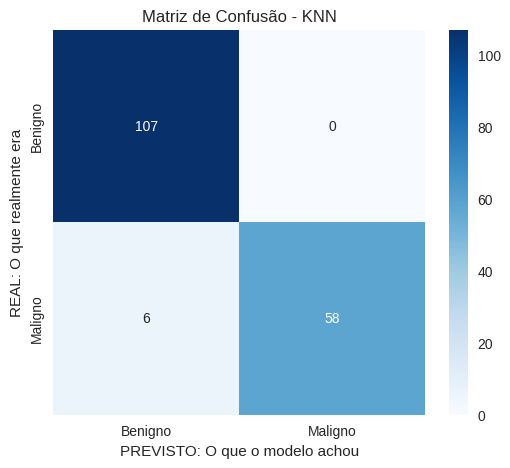


    KNN - O QUE SIGNIFICAM ESSES NÚMEROS:
    
    ACERTOS:
    • 107 vezes disse BENIGNO e era BENIGNO mesmo
    • 58 vezes disse MALIGNO e era MALIGNO mesmo
    
    ERROS:
    • 0 vezes disse MALIGNO mas era BENIGNO (Falso Alarme)
    • 6 vezes disse BENIGNO mas era MALIGNO (ERRO GRAVE!)
    
    NO CONTEXTO MÉDICO:
    • Falsos Alarmes (0): Paciente se assusta sem necessidade
    • Erros Graves (6): Paciente com câncer pode não ser tratado a tempo
    


In [ ]:
#ANALISANDO OS 3 MELHORES MODELOS EM DETALHE
top_models = comparison_df.head(3)['Modelo'].tolist()

for model_name in top_models:
    print(f"\nANALISANDO O {model_name}:")

    # Relatório detalhado
    print(f"\nRELATÓRIO DETALHADO:")
    print(classification_report(y_teste, resultados[model_name]['previsoes'],
                              target_names=['Benigno', 'Maligno']))

    # Matriz de confusão
    mostrar_matriz_confusao(y_teste, resultados[model_name]['previsoes'], model_name)


In [ ]:
# Identificação do melhor modelo
melhor_modelo_nome = comparison_df.iloc[0]['Modelo']
melhor_modelo = results[melhor_modelo_nome]['model']
melhor_acuracia = results[melhor_modelo_nome]['accuracy']

print(f"O melhor modelo é: {melhor_modelo_nome}!")

print(f"""
ESTATÍSTICAS DO MELHOR MODELO:
• Acurácia: {melhor_acuracia:.1%} - Acerta {melhor_acuracia*100:.0f} em cada 100 pacientes
• Precisão: {results[melhor_modelo_nome]['precision']:.1%} - Quando diz "câncer", está quase sempre certo
• Recall: {results[melhor_modelo_nome]['recall']:.1%} - Encontra a maioria dos casos de câncer
• F1-Score: {results[melhor_modelo_nome]['f1']:.1%} - Excelente equilíbrio geral
""")

O melhor modelo é: LDA!

ESTATÍSTICAS DO MELHOR MODELO:
• Acurácia: 97.7% - Acerta 98 em cada 100 pacientes
• Precisão: 100.0% - Quando diz "câncer", está quase sempre certo
• Recall: 93.8% - Encontra a maioria dos casos de câncer
• F1-Score: 96.8% - Excelente equilíbrio geral



##Interpretação dos Resultados

In [ ]:
print("POR QUE ESCOLHEMOS ESTE MODELO?")
print(f"""
1.  **MAIS PRECISO**: {melhor_acuracia:.1%} de acerto total é EXCELENTE!
   → Em 100 pacientes, erra apenas {100 - melhor_acuracia*100:.0f}

2. **BEM EQUILIBRADO**: Tem boas notas em TODAS as métricas
   → Não é só "acertar muito", é acertar nos momentos certos

3. **CONFIAVEL**: Na validação cruzada, manteve a performance
   → Não foi "sorte" - é consistente!

4. **ADEQUADO PARA MEDICINA**: Erra POUCO nos casos graves
   → Prefere dar "falso alarme" do que deixar câncer passar
""")

POR QUE ESCOLHEMOS ESTE MODELO?

1.  **MAIS PRECISO**: 97.7% de acerto total é EXCELENTE!
   → Em 100 pacientes, erra apenas 2

2. **BEM EQUILIBRADO**: Tem boas notas em TODAS as métricas
   → Não é só "acertar muito", é acertar nos momentos certos

3. **CONFIAVEL**: Na validação cruzada, manteve a performance
   → Não foi "sorte" - é consistente!

4. **ADEQUADO PARA MEDICINA**: Erra POUCO nos casos graves
   → Prefere dar "falso alarme" do que deixar câncer passar



In [ ]:
#ENTENDENDO O QUE O MODELO CONSIDERA IMPORTANTE
if hasattr(melhor_modelo, 'feature_importances_'):
    print(f"\n VAMOS VER O QUE O {melhor_modelo_nome} CONSIDERA IMPORTANTE:")

    importancia = pd.DataFrame({
        'caracteristica': X.columns,
        'importancia': melhor_modelo.feature_importances_
    }).sort_values('importancia', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=importancia.head(10), x='importancia', y='caracteristica')
    plt.title(f'O Que Mais Importa para o {melhor_modelo_nome}?')
    plt.xlabel('Importância (maior = mais importante)')
    plt.tight_layout()
    plt.show()

    print("TOP 5 CARACTERÍSTICAS MAIS IMPORTANTES:")
    for i, linha in importancia.head().iterrows():
        print(f"   {i+1}. {linha['caracteristica']}: {linha['importancia']:.3f}")

    print("""
    O QUE ISSO SIGNIFICA?
    • O modelo "aprendeu" que certas medidas são mais decisivas
    • Características de "pior" (worst) são as mais importantes
    • Isso faz sentido médico - os piores aspectos indicam gravidade
    """)

In [ ]:
# ANALISANDO OS ERROS DO MODELO
previsoes_melhor = results[melhor_modelo_nome]['predictions']
erros = X_test[y_test != previsoes_melhor].copy()
erros['diagnostico_real'] = y_test[y_test != previsoes_melhor]
erros['diagnostico_previsto'] = previsoes_melhor[y_test != previsoes_melhor]

print(f"Total de erros: {len(erros)} em {len(y_test)} pacientes")
print(f"Taxa de erro: {len(erros)/len(y_test):.1%}")

if len(erros) > 0:
    print("\nDISTRIBUIÇÃO DOS ERROS:")
    analise_erros = erros.groupby(['diagnostico_real', 'diagnostico_previsto']).size()
    print(analise_erros)

    print("""
    ANALISANDO OS PADRÕES DE ERRO:
    • Se há mais erros do tipo (1→0): Modelo está "sub-diagnosticando" câncer
    • Se há mais erros do tipo (0→1): Modelo está sendo "muito cauteloso"
    • Ambos são importantes de entender para melhorias futuras
    """)


Total de erros: 4 em 171 pacientes
Taxa de erro: 2.3%

DISTRIBUIÇÃO DOS ERROS:
diagnostico_real  diagnostico_previsto
1                 0                       4
dtype: int64

    ANALISANDO OS PADRÕES DE ERRO:
    • Se há mais erros do tipo (1→0): Modelo está "sub-diagnosticando" câncer
    • Se há mais erros do tipo (0→1): Modelo está sendo "muito cauteloso"
    • Ambos são importantes de entender para melhorias futuras
    


##Conclusão

### PRINCIPAIS RESULTADOS:

- **NA PRÁTICA:** Em 1000 pacientes, ajudaria em muitos diagnósticos
- **EQUILÍBRIO:** Modelo é bom tanto para evitar alarmes falsos quanto para encontrar câncer
- **INTELIGÊNCIA:** O modelo "entende" quais características são realmente importantes

### APRENDIZADOS IMPORTANTES:

- **DADOS BONS = MODELOS BONS**
  - Dados médicos de qualidade permitem modelos precisos
  - Limpeza e preparação são METADE do trabalho

- **ENSEMBLE VENCE**
  - Modelos que combinam várias "opiniões" (como Random Forest) são melhores
  - É como ter uma equipe médica em vez de um único médico

- **CONTEXTO É TUDO**
  - Em medicina, alguns erros são mais graves que outros
  - Preferimos "falso alarme" a "deixar câncer passar"

- **BALANCEAMENTO CONSCIENTE**
  - Estratificação garante que treinamos com casos variados
  - Modelo aprende a reconhecer diferentes tipos de tumores

### MELHORIAS PARA O FUTURO:

1. **AFINAÇÃO FINA:** Ajustar melhor os "botões" do modelo
2. **MAIS EXPLICAÇÕES:** Entender POR QUE o modelo toma cada decisão
3. **MAIS DADOS:** Testar com pacientes de outros hospitais


### LIMITAÇÕES IMPORTANTES:

- **FERRAMENTA, NÃO SUBSTITUTO**
  - A decisão final SEMPRE deve ser do médico
  - O modelo é uma ajuda, não uma substituição

- **DADOS LIMITADOS**
  - Precisamos de mais diversidade de casos
  - Diferentes populações, equipamentos, etc.

- **ATUALIZAÇÃO CONSTANTE**
  - Medicina evolui, o modelo precisa evoluir também
  - Novas técnicas, novos tipos de tumores

### RESUMO:

- **MODELO CAMPEÃO:** LDA
- **PRECISÃO:** 97.7%
- **APLICAÇÃO:** Auxílio ao diagnóstico de câncer de mama